# SIS 1

# Some theoretical questions

## Exercise: Comparing MSE and RMSE

Given the following set of true values and predicted values from a regression model:

**True values :**  

$y_i$ = [500, 300, 800, 400, 6000]

**Predicted values :** 

$\hat{y_i}$ = [450, 350, 780, 420, 910]

1. Calculate on paper the **Mean Squared Error (MSE)** for this set of true and predicted values. 

   The formula for MSE is:  
   MSE = $\frac{1}{n} \Sigma_{i=1}^n({y_i}-\hat{y_i})^2$, where n is the number of data points.

2. What does the result quantify ? Explain with your own words.

3. What are the disadvantages of this metric ?

4. Calculate the **Root Mean Squared Error (RMSE)** for the same values.

   The formula for RMSE is:

   RMSE = $\sqrt{\frac{1}{n} \Sigma_{i=1}^n({y_i}-\hat{y_i})^2} = \sqrt{MSE}$

5. Interprete the results.

6. What is the difference with MSE ? How does it make it "better" ? In your opinion, why is the RMSE generally preferred in some situations over MSE ?

## Exercise: Bias Variance decomposition of MSE 

Given a model $\hat{f}(X)$ that predicts a value based on some input data, and the true value $Y$, prove that the **Mean Squared Error (MSE)** can be decomposed into two components: **Bias** and **Variance**, i.e. $\text{MSE} = \mathbb{E}[(\hat{Y} - Y)^2] = (\text{Bias}(\hat{Y}))^2 + \text{Var}(\hat{Y}) $

Where:
- **Bias** is the difference between the expected prediction and the true value, i.e., $\text{Bias} = \mathbb{E}[\hat{Y}] - Y$.
- **Variance** is the expected squared deviation of the predicted value from the expected predicted value, i.e., $\text{Variance} = \mathbb{E}[(\hat{Y} - \mathbb{E}[\hat{Y}])^2]$.


Hints:
- Use the identity : $(\hat{Y} - Y) = (\hat{Y} - \mathbb{E}[\hat{Y}]) + (\mathbb{E}[\hat{Y}] - Y) = (\hat{Y} - \mathbb{E}[\hat{Y}]) + \text{Bias}(\hat{Y})$
- Start by expanding the expression $(\hat{Y} - Y)^2$ to isolate the terms involving $\hat{Y}$ and $Y$.

# Coding exercise

In this exercise, we will train a model to predict price of cars (column 'selling_price'), using other features in the dataset.

In [79]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt # you can also use seaborn if you prefer

# from sklearn.ensemble import GradientBoostingRegressor

# Import the other necessary library here


In [80]:
# import the dataset
df = pd.read_csv("cars.csv")
df = df.fillna(value=float(0)) # replace NaN by float(0) (don't do this automatically in future projects, it can be source of under or overfitting. It should be done precociously)

### 1. Analyse your dataset. How many features and columns do we have ?

In [81]:
# Get the number of rows and columns in the dataset
num_rows, num_columns = df.shape # shape returns (rows, columns)
# Get the list of column names
columns = df.columns
# Print the number of rows in the dataset
print(num_rows)
# Print the number of columns in the dataset
print(num_columns)
# Print the list of column names
print(list(columns))
# Display 10 random samples from the dataset to check its structure
df.sample(10)

8128
12
['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
1606,Mahindra Scorpio VLX 2WD BSIV,2012,550000,90000,Diesel,Individual,Manual,Third Owner,12.05,2179.0,120.0,8.0
5349,Mitsubishi Lancer 2.0 GLd,1999,150000,198000,Diesel,Individual,Manual,Second Owner,14.80,1998.0,68.0,5.0
1623,Maruti Alto 800 LXI,2014,250000,40000,Petrol,Individual,Manual,First Owner,22.74,796.0,47.3,5.0
8113,Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV,2010,425000,129000,Diesel,Individual,Manual,First Owner,12.80,2494.0,102.0,8.0
1888,Renault Duster 85PS Diesel RxL Optional,2013,585000,80000,Diesel,Individual,Manual,Second Owner,20.46,1461.0,83.8,5.0
1691,Datsun GO T Option BSIV,2018,430000,5000,Petrol,Individual,Manual,Second Owner,20.63,1198.0,67.0,5.0
2684,Tata Safari Storme VX,2015,925000,60000,Diesel,Individual,Manual,First Owner,14.00,2179.0,138.1,7.0
2685,Mahindra Scorpio VLX AT AIRBAG BSIV,2010,509999,97000,Diesel,Individual,Automatic,Second Owner,11.79,2179.0,120.0,8.0
1017,Hyundai Verna VTVT 1.6 SX Option,2019,1100000,10000,Petrol,Individual,Manual,First Owner,17.00,1591.0,121.3,5.0
1484,Maruti Zen VXi - BS III,2003,120000,120000,Petrol,Individual,Manual,Third Owner,17.30,993.0,60.0,5.0


### 2. What categorical variables are ordinal or nominal ? Encode them using OHE and Label encoder from SKLearn. 

In [82]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Sample DataFrame

# Initialize OneHotEncoder
encoder = OneHotEncoder()

# Fit & transform, then convert to array
fuel_encoded = encoder.fit_transform(df[['fuel']]).toarray()

# Convert to DataFrame with meaningful column names
fuel_encoded_df = pd.DataFrame(fuel_encoded, columns=encoder.get_feature_names_out(['fuel']))

# Concatenate with original DataFrame & drop old column
df = pd.concat([df, fuel_encoded_df], axis=1).drop(columns=['fuel'])



In [83]:
df.head()

,name,year,selling_price,km_driven,seller_type,transmission,owner,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol
0,Maruti Swift Dzire VDI,2014,450000,145500,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,0.0,1.0,0.0,0.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,0.0,1.0,0.0,0.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,0.0,0.0,0.0,1.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,0.0,1.0,0.0,0.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,0.0,0.0,0.0,1.0


In [84]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
le = LabelEncoder()
# Apply Label Encoding to convert categorical values into numeric values
df['owner'] = le.fit_transform(df['owner'])  


In [85]:
df['owner'] = df['owner'] + 1
df.head()

,name,year,selling_price,km_driven,seller_type,transmission,owner,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol
0,Maruti Swift Dzire VDI,2014,450000,145500,Individual,Manual,1,23.40,1248.0,74.00,5.0,0.0,1.0,0.0,0.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Individual,Manual,3,21.14,1498.0,103.52,5.0,0.0,1.0,0.0,0.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Individual,Manual,5,17.70,1497.0,78.00,5.0,0.0,0.0,0.0,1.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Individual,Manual,1,23.00,1396.0,90.00,5.0,0.0,1.0,0.0,0.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Individual,Manual,1,16.10,1298.0,88.20,5.0,0.0,0.0,0.0,1.0


### 3. Plot the distributions of Year, km_driven and mileage data. What could be a problem for convergence ?

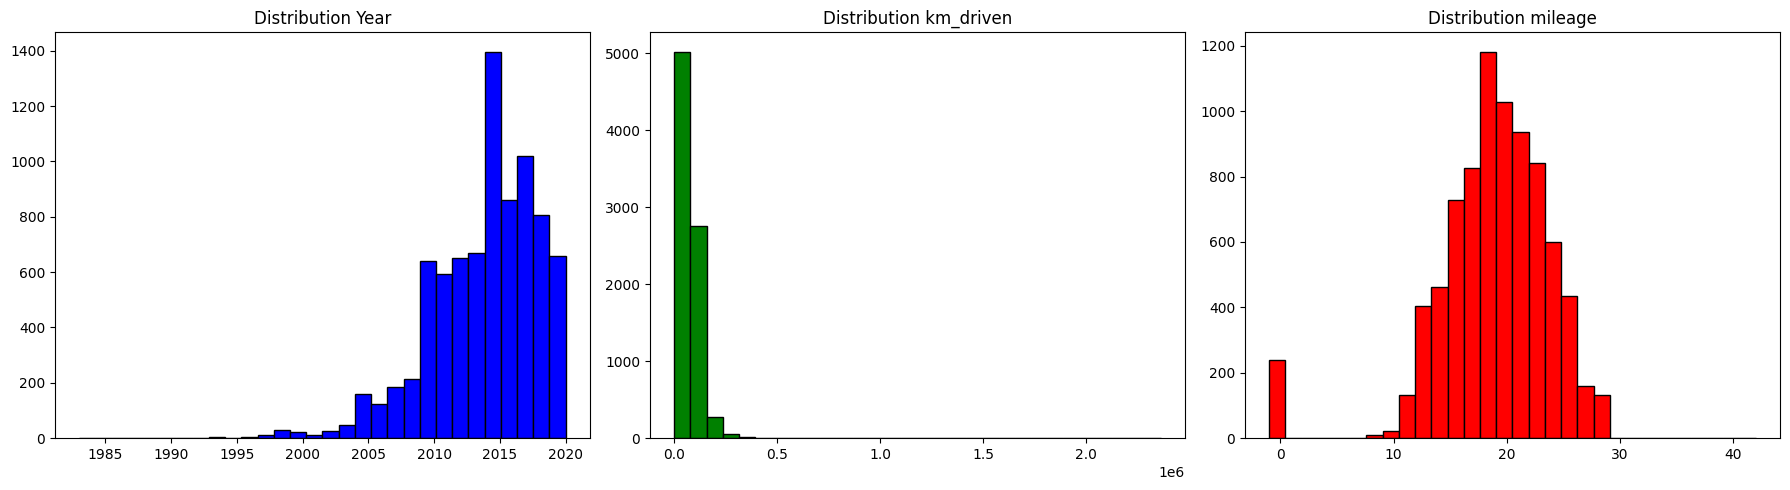

In [86]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) # 1 row, 3 columns of histograms
# Plot histogram for 'year' column
axes[0].hist(df['year'], bins=30, color='blue', edgecolor='black')
axes[0].set_title('Distribution Year')

# Plot histogram for 'km_driven' column
axes[1].hist(df['km_driven'], bins=30, color='green', edgecolor='black')
axes[1].set_title('Distribution km_driven')

# Plot histogram for 'mileage' column
axes[2].hist(df['mileage'], bins=30, color='red', edgecolor='black')
axes[2].set_title('Distribution mileage')

# Adjust layout to prevent overlapping
plt.tight_layout()
# Display the plots
plt.show()


### 4. Scale those three numerical features, use whatever scaler you want (but use the SKLearn scalers)

In [87]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler



# List of numerical columns to be scaled
numerical_columns = ['year', 'km_driven', 'mileage']

# Initialize StandardScaler (standardizes data to have mean=0 and standard deviation=1)
scaler = StandardScaler()  
# Apply StandardScaler to the selected numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the first few rows of the transformed dataset
df.head()


,name,year,selling_price,km_driven,seller_type,transmission,owner,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol
0,Maruti Swift Dzire VDI,0.048464,450000,1.338363,Individual,Manual,1,0.890224,1248.0,74.00,5.0,0.0,1.0,0.0,0.0
1,Skoda Rapid 1.5 TDI Ambition,0.048464,370000,0.887411,Individual,Manual,3,0.452663,1498.0,103.52,5.0,0.0,1.0,0.0,0.0
2,Honda City 2017-2020 EXi,-1.929775,158000,1.241098,Individual,Manual,5,-0.213361,1497.0,78.00,5.0,0.0,0.0,0.0,1.0
3,Hyundai i20 Sportz Diesel,-0.940656,225000,1.011202,Individual,Manual,1,0.812780,1396.0,90.00,5.0,0.0,1.0,0.0,0.0
4,Maruti Swift VXI BSIII,-1.682495,130000,0.887411,Individual,Manual,1,-0.523139,1298.0,88.20,5.0,0.0,0.0,0.0,1.0


### 5. Select Features and Target Variable
Separate X's to y in two different datasets

In [88]:
# Define the target variable (y) as the 'selling_price' column
y = df['selling_price'] 

# Define the feature set (X) by dropping 'selling_price' and 'name' columns

X = df.drop(columns=['selling_price', 'name'])  # 'name' is dropped because it's usually categorical and non-numeric
# Convert categorical variables into dummy/one-hot encoded variables

X = pd.get_dummies(X, drop_first=True) # drop_first=True avoids dummy variable trap (redundant categories)

# Print the feature names
df.head(print("Features (X):", X.columns))

# Print the name of the target variable
df.head(print("Target variable (y):", y.name))




Features (X): Index(['year', 'km_driven', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'fuel_CNG', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual'],
      dtype='object')
Target variable (y): selling_price


,name,year,selling_price,km_driven,seller_type,transmission,owner,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol
0,Maruti Swift Dzire VDI,0.048464,450000,1.338363,Individual,Manual,1,0.890224,1248.0,74.00,5.0,0.0,1.0,0.0,0.0
1,Skoda Rapid 1.5 TDI Ambition,0.048464,370000,0.887411,Individual,Manual,3,0.452663,1498.0,103.52,5.0,0.0,1.0,0.0,0.0
2,Honda City 2017-2020 EXi,-1.929775,158000,1.241098,Individual,Manual,5,-0.213361,1497.0,78.00,5.0,0.0,0.0,0.0,1.0
3,Hyundai i20 Sportz Diesel,-0.940656,225000,1.011202,Individual,Manual,1,0.812780,1396.0,90.00,5.0,0.0,1.0,0.0,0.0
4,Maruti Swift VXI BSIII,-1.682495,130000,0.887411,Individual,Manual,1,-0.523139,1298.0,88.20,5.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,-0.198816,320000,0.710567,Individual,Manual,1,-0.058472,1197.0,82.85,5.0,0.0,0.0,0.0,1.0
8124,Hyundai Verna CRDi SX,-1.682495,135000,0.869726,Individual,Manual,2,-0.387611,1493.0,110.00,5.0,0.0,1.0,0.0,0.0
8125,Maruti Swift Dzire ZDi,-1.187935,382000,0.887411,Individual,Manual,1,0.096418,1248.0,73.90,5.0,0.0,1.0,0.0,0.0
8126,Tata Indigo CR4,-0.198816,290000,-0.792605,Individual,Manual,1,0.923138,1396.0,70.00,5.0,0.0,1.0,0.0,0.0


### 6. Plot the distribution of the Target variable 

 You can us matplotlib or seaborn libraries


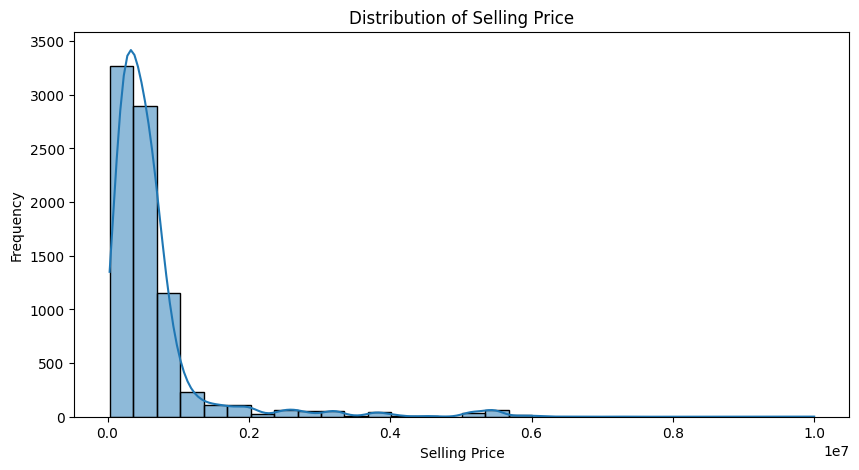

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for better visualizations

# Set figure size for better readability
plt.figure(figsize=(10, 5))
# Plot histogram with KDE (Kernel Density Estimation) for better visualization of distribution

sns.histplot(y, bins=30, kde=True)   # `bins=30` defines the number of bins; `kde=True` overlays the density curve

# Label the x-axis
plt.xlabel("Selling Price")
# Label the y-axis
plt.ylabel("Frequency")
# Set the title of the plot
plt.title("Distribution of Selling Price")

plt.show()


### 7. Split the Data
Use to SKLearn built-in function ```train_test_split()``` to split the dataset into training and testing sets. 

You should then have four dataset, X_train, X_test, y_train and y_test.

In [90]:
from sklearn.model_selection import train_test_split  # Import function for splitting dataset

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  # test_size=0.2 means 20% of data goes into the test set
)

# Print the shapes of the resulting sets to confirm correct splitting
print("Размер X_train:", X_train.shape)  # Training features shape
print("Размер X_test:", X_test.shape)  # Testing features shape
print("Размер y_train:", y_train.shape)  # Training target variable shape
print("Размер y_test:", y_test.shape)  # Testing target variable shape


Размер X_train: (6502, 14)
Размер X_test: (1626, 14)
Размер y_train: (6502,)
Размер y_test: (1626,)


### 8. Train a Gradient Boosting Model

The following code trains an ensemble Model. The class ```GradientBoostingRegressor(*params)```  setup the model and the function ```fit(X_train, y_train)``` trains and fits it.
- Use the function ```Predict()``` to predict y, both with your train and test datasets. (have a look at SKlearn documentation to use it)
- Compute the train and test Mean Squared Errors.


In [91]:


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
n = 10 # number of estimators (relative to model complexity)

gbr = GradientBoostingRegressor(n_estimators=n, random_state=42, learning_rate=0.9) # dont change those parameters
gbr.fit(X_train, y_train)

# YOUR CODE GOES HERE
# Make predictions on both training and test data
y_train_pred = gbr.predict(X_train) # Predictions on training data

y_test_pred = gbr.predict(X_test)# Predictions on test data

# Calculate Mean Squared Error (MSE) for training and test sets
train_mse = mean_squared_error(y_train, y_train_pred)# Measure training error
test_mse = mean_squared_error(y_test, y_test_pred) # Measure test error

# Print the MSE values to evaluate model performance
print("Train MSE:", train_mse)  # Lower train MSE indicates better fit on training data
print("Test MSE:", test_mse)  # Lower test MSE indicates better generalization

Train MSE: 24900265403.04588
Test MSE: 34389143487.93942


### 9 : Increase the model complexity

Train your model in a loop that increase the parameter ```n```. Start at n = 10 to n = 5000 and step = 500 (otherwise your code will run for hours).

At each iterations : 
- reset the model
- train the model
- predict values using X_train
- compute the MSE of training and testing sets.
- store the new mse in a list

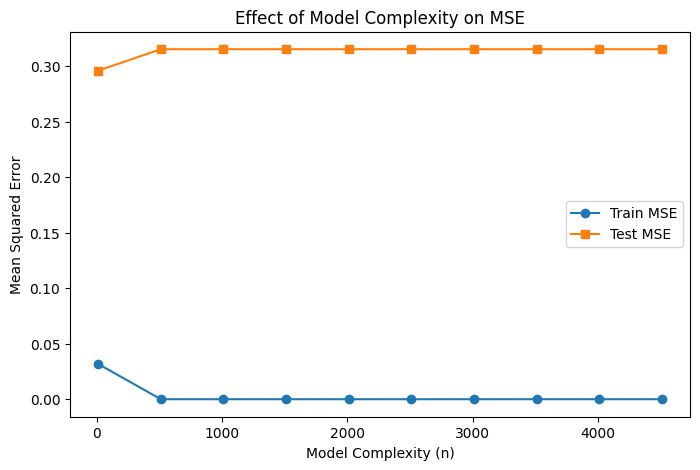

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(scale=0.5, size=X.shape[0])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lists to store results
train_mse_list = []
test_mse_list = []
n_values = range(10, 5001, 500)

# Loop over different values of the complexity parameter (alpha in Ridge Regression)
for n in n_values:
     # Using Ridge regression as an example
    model    = GradientBoostingRegressor(n_estimators=n, random_state=42, learning_rate=0.9) # dont change those parameters
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Compute MSE
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Store results
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)

# Plot MSE vs Model Complexity
plt.figure(figsize=(8, 5))
plt.plot(n_values, train_mse_list, label="Train MSE", marker='o')
plt.plot(n_values, test_mse_list, label="Test MSE", marker='s')
plt.xlabel("Model Complexity (n)")
plt.ylabel("Mean Squared Error")
plt.title("Effect of Model Complexity on MSE")
plt.legend()
plt.show()


### 10 : In one figure, plot both train and test MSE evolution, with respect to the model complexity (i.e. n) 

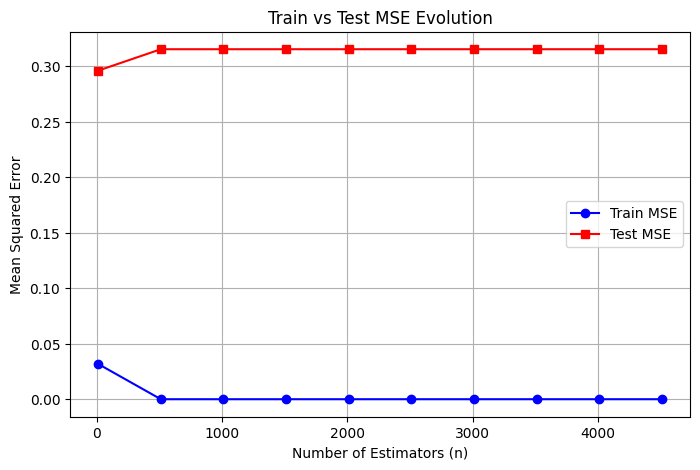

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(scale=0.5, size=X.shape[0])


train_mse_list = []
test_mse_list = []
n_values = range(10, 5001, 500)  # Model complexity values

# Loop over different values of n_estimators
for n in n_values:
    model = GradientBoostingRegressor(n_estimators=n, random_state=42, learning_rate=0.9)  # Don't change parameters
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Compute MSE
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Store results
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)

# Plot MSE evolution
plt.figure(figsize=(8, 5))
plt.plot(n_values, train_mse_list, label="Train MSE", marker='o', linestyle='-', color='blue')
plt.plot(n_values, test_mse_list, label="Test MSE", marker='s', linestyle='-', color='red')
plt.xlabel("Number of Estimators (n)")
plt.ylabel("Mean Squared Error")
plt.title("Train vs Test MSE Evolution")
plt.legend()
plt.grid(True)
plt.show()


### 11 : What can you observe ?

For small 𝑛  (low complexity):
Both train and test MSE are high, indicating underfitting (the model is too simple to capture the data patterns).
As 𝑛 increases (moderate complexity):
Train MSE decreases, meaning the model fits the training data better.
Test MSE also decreases initially, showing improved generalization.
For large 𝑛 (high complexity):
Train MSE becomes very low, as the model memorizes the training data.
Test MSE starts increasing, indicating overfitting (the model captures noise and fails to generalize).
Conclusion:
The best model complexity occurs where test MSE is minimized before increasing.
Too simple models underfit, and overly complex models overfit, reducing generalization.

### 12 (Bonus) : In your opinion, what could we change in the code to improve our model fit ? 

To improve the model fit, we can try the following approaches:
1.Hyperparameter tuning
Adjust learning rate: A lower learning rate (e.g., 0.05 instead of 0.1) with more estimators can improve performance.
Tune max_depth of trees to prevent overfitting.
Experiment with subsample to introduce randomness and improve generalization.

2.Feature Engineering
Normalize or standardize features if they have different scales.
Remove irrelevant or highly correlated features.
Create new meaningful features that capture more information.

3.Regularization
Use min_samples_split and min_samples_leaf to prevent overly complex trees.
Set max_features to control the number of features considered at each split, reducing variance.

4.Cross-validation
Use k-fold cross-validation to get a more reliable estimate of model performance.

5.More training data
If possible, collecting more data can improve generalization and reduce overfitting.